# 100 ddim steps

In [82]:
from tambo_diffusion_generator import TamboDiffusionGenerator

# Initialize with custom parameters
generator = TamboDiffusionGenerator(
        checkpoint_path="/n/holylfs05/LABS/arguelles_delgado_lab/Everyone/hhanif/tambo_ckpts/diffusion/ckpt_epoch=1999.ckpt",
        output_dir="diffusion_model/run_3",
        tambo_optimization_path="/n/holylfs05/LABS/arguelles_delgado_lab/Everyone/hhanif/tambo_optimization",
        device="cuda:0",
        ddim_steps=100
    )

Initialized TamboDiffusionGenerator
Device: cuda:0
Output directory: diffusion_model/run_3


In [83]:
# Run each step manually
generator.load_model()

Loaded checkpoint: /n/holylfs05/LABS/arguelles_delgado_lab/Everyone/hhanif/tambo_ckpts/diffusion/ckpt_epoch=1999.ckpt
Model set to eval mode.
DDIM sampler built (ddim_steps=100, eta=0.0)
Model loading time: 1.27s


In [84]:
generator.setup_data()

Sample image shape: torch.Size([3, 32, 32])
Total samples: 46942
Test dataloader ready. Number of batches: 37


In [85]:
generator.extract_test_samples(num_conditions=1)

Collected 1 conditioning vectors.
First conditioning vector (cpu): tensor([ 1.4296,  0.8087,  0.6604,  1.3828, -0.3484])


In [86]:
outputs = generator.generate_samples(num_samples=1, num_conditions=1, chunk_size=100)

Starting generation for condition 1/1
Condition (cpu): tensor([ 1.4296,  0.8087,  0.6604,  1.3828, -0.3484])
Condition 1/1: 1/1 samples done
Concatenated generated images for condition 1: torch.Size([1, 3, 32, 32])
Finished condition 1/1
✔ Done: generated 1 images across 1 conditions.
Total generation time: 2.14s


energy: 1.429570198059082
sin_z: 0.8087248802185059
cos_z: 0.6604409217834473
sin_a: 1.3828048706054688
cos_a: -0.34841758012771606


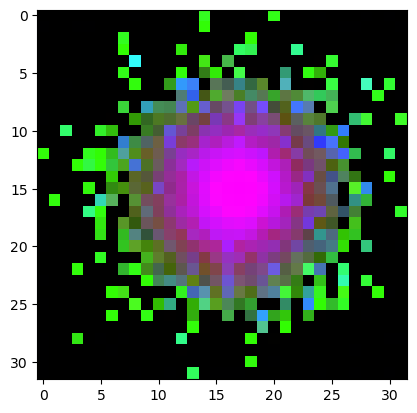

In [87]:
import matplotlib.pyplot as plt


for output in outputs:
    condition_name = [ 'energy', 'sin_z', 'cos_z', 'sin_a', 'cos_a' ]
    for icondition, condition in enumerate(output['condition']):
        print(f"{condition_name[icondition]}: {condition}")

    output_mean = output['images'].mean(dim=0)
    output_mean = output_mean.permute(1, 2, 0)  # Change from (C, H, W) to (H, W, C) if needed
    # normalize between 0 and 1
    output_mean = (output_mean - output_mean.min()) / (output_mean.max() - output_mean.min())
    plt.imshow(output_mean.cpu(), cmap='viridis') 
    plt.show()
    break

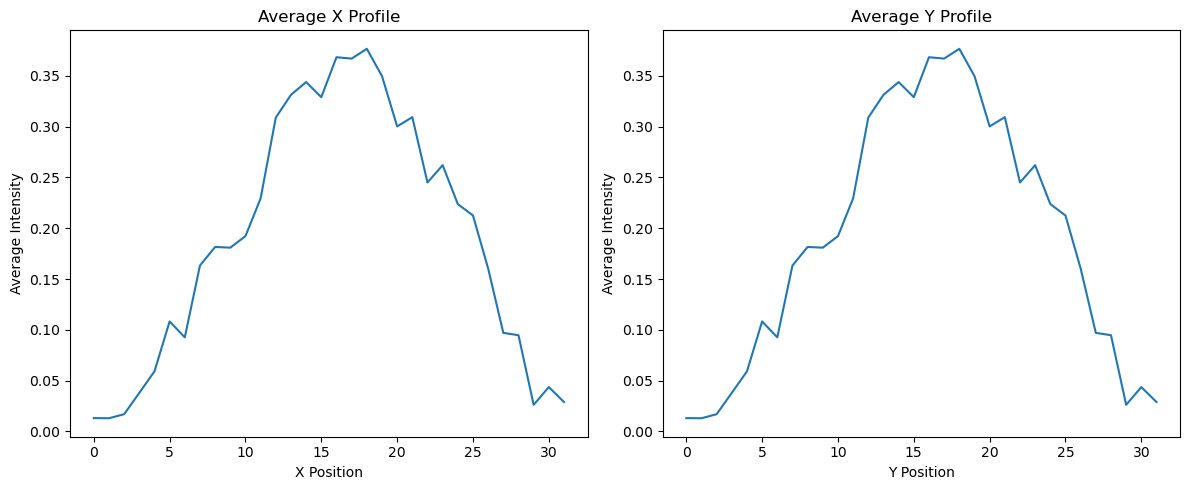

In [88]:
# plot average values accorss x and y profile
import numpy as np
import matplotlib.pyplot as plt
import torch

for output in outputs:
    images = output['images']  # Shape: (N, C, H, W)
    images_np = images.cpu().numpy().squeeze()

    avg_x_profile = images_np.mean(axis=(0, 1))  # Average over N and C -> Shape: (H, W)
    avg_y_profile = images_np.mean(axis=(0, 1)).T  # Transpose to get Y profile

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.title('Average X Profile')
    plt.plot(avg_x_profile)
    plt.xlabel('X Position')
    plt.ylabel('Average Intensity')

    plt.subplot(1, 2, 2)
    plt.title('Average Y Profile')
    plt.plot(avg_y_profile)
    plt.xlabel('Y Position')
    plt.ylabel('Average Intensity')

    plt.tight_layout()
    plt.show()
    break

# 5 ddim steps

In [89]:
from tambo_diffusion_generator import TamboDiffusionGenerator

# Initialize with custom parameters
generator = TamboDiffusionGenerator(
        checkpoint_path="/n/holylfs05/LABS/arguelles_delgado_lab/Everyone/hhanif/tambo_ckpts/diffusion/ckpt_epoch=1999.ckpt",
        output_dir="diffusion_model/run_3",
        tambo_optimization_path="/n/holylfs05/LABS/arguelles_delgado_lab/Everyone/hhanif/tambo_optimization",
        device="cuda:0",
        ddim_steps=3
    )

Initialized TamboDiffusionGenerator
Device: cuda:0
Output directory: diffusion_model/run_3


In [90]:
# Run each step manually
generator.load_model()

Loaded checkpoint: /n/holylfs05/LABS/arguelles_delgado_lab/Everyone/hhanif/tambo_ckpts/diffusion/ckpt_epoch=1999.ckpt
Model set to eval mode.
DDIM sampler built (ddim_steps=3, eta=0.0)
Model loading time: 1.31s


In [91]:
generator.setup_data()

Sample image shape: torch.Size([3, 32, 32])
Total samples: 46942
Test dataloader ready. Number of batches: 37


In [92]:
generator.extract_test_samples(num_conditions=1)

Collected 1 conditioning vectors.
First conditioning vector (cpu): tensor([ 1.4296,  0.8087,  0.6604,  1.3828, -0.3484])


In [93]:
outputs = generator.generate_samples(num_samples=1, num_conditions=1, chunk_size=100)

Starting generation for condition 1/1
Condition (cpu): tensor([ 1.4296,  0.8087,  0.6604,  1.3828, -0.3484])
Condition 1/1: 1/1 samples done
Concatenated generated images for condition 1: torch.Size([1, 3, 32, 32])
Finished condition 1/1
✔ Done: generated 1 images across 1 conditions.
Total generation time: 0.11s


energy: 1.429570198059082
sin_z: 0.8087248802185059
cos_z: 0.6604409217834473
sin_a: 1.3828048706054688
cos_a: -0.34841758012771606


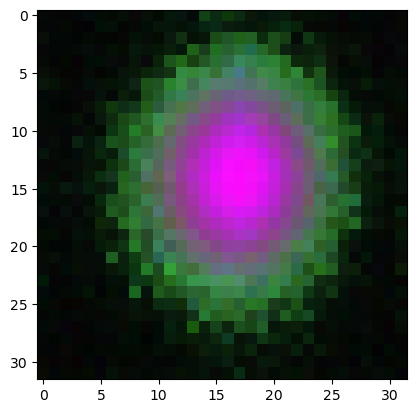

In [94]:
import matplotlib.pyplot as plt


for output in outputs:
    condition_name = [ 'energy', 'sin_z', 'cos_z', 'sin_a', 'cos_a' ]
    for icondition, condition in enumerate(output['condition']):
        print(f"{condition_name[icondition]}: {condition}")

    output_mean = output['images'].mean(dim=0)
    output_mean = output_mean.permute(1, 2, 0)  # Change from (C, H, W) to (H, W, C) if needed
    # normalize between 0 and 1
    output_mean = (output_mean - output_mean.min()) / (output_mean.max() - output_mean.min())
    plt.imshow(output_mean.cpu(), cmap='viridis') 
    plt.show()
    break

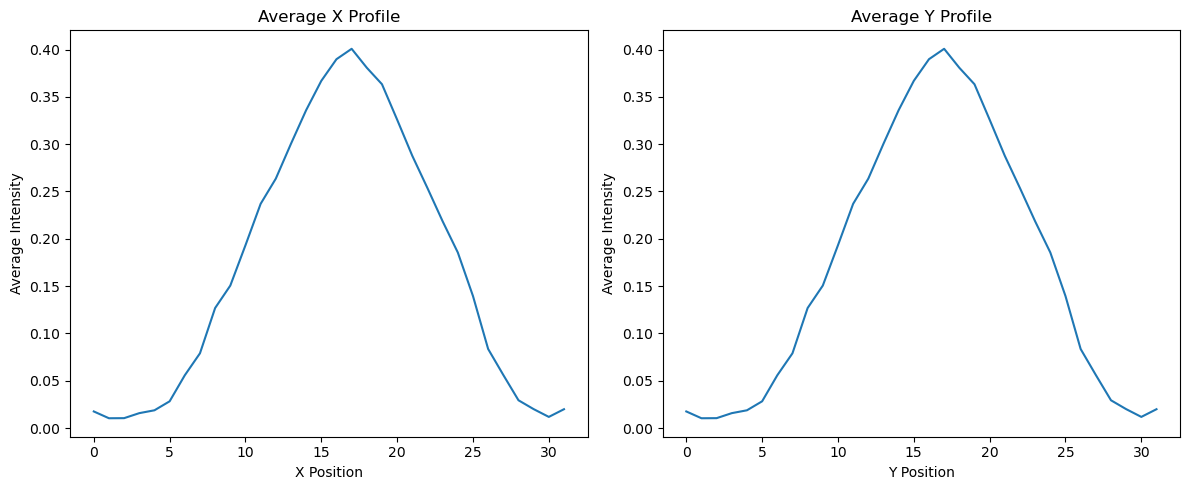

In [95]:
# plot average values accorss x and y profile
import numpy as np
import matplotlib.pyplot as plt
import torch

for output in outputs:
    images = output['images']  # Shape: (N, C, H, W)
    images_np = images.cpu().numpy().squeeze()

    avg_x_profile = images_np.mean(axis=(0, 1))  # Average over N and C -> Shape: (H, W)
    avg_y_profile = images_np.mean(axis=(0, 1)).T  # Transpose to get Y profile

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.title('Average X Profile')
    plt.plot(avg_x_profile)
    plt.xlabel('X Position')
    plt.ylabel('Average Intensity')

    plt.subplot(1, 2, 2)
    plt.title('Average Y Profile')
    plt.plot(avg_y_profile)
    plt.xlabel('Y Position')
    plt.ylabel('Average Intensity')

    plt.tight_layout()
    plt.show()
    break

In [36]:
# class DDIMSampler(nn.Module):
#     def __init__(self, model, beta_1, beta_T, T, eta=0.0, ddim_steps=50):
#         super().__init__()
#         self.model = model
#         self.T = T
#         self.eta = eta
#         self.ddim_steps = ddim_steps
#         self.register_buffer("betas", torch.linspace(beta_1, beta_T, T))
#         self.register_buffer("alphas", 1.0 - self.betas)
#         self.register_buffer("alphas_cumprod", torch.cumprod(self.alphas, dim=0))
#         self.register_buffer("sqrt_alphas_cumprod", torch.sqrt(self.alphas_cumprod))
#         self.register_buffer("sqrt_one_minus_alphas_cumprod", torch.sqrt(1 - self.alphas_cumprod))
#         self.ddim_timesteps = self.get_ddim_timesteps()

#     def get_ddim_timesteps(self):
#         return torch.linspace(0, self.T - 1, self.ddim_steps).long()

#     def forward(self, x, energy, sin_zenith, cos_zenith, sin_azimuth, cos_azimuth):
#         for i in reversed(range(len(self.ddim_timesteps))):
#             t = int(self.ddim_timesteps[i].item())
#             t_tensor = torch.full((x.shape[0],), t, device=x.device, dtype=torch.long)
#             eps = self.model(x, t_tensor, energy, sin_zenith, cos_zenith, sin_azimuth, cos_azimuth)
#             alpha_t = self.alphas_cumprod[t]
#             sqrt_alpha_t = self.sqrt_alphas_cumprod[t]
#             sqrt_one_minus_alpha_t = self.sqrt_one_minus_alphas_cumprod[t]
#             x0_pred = (x - sqrt_one_minus_alpha_t * eps) / sqrt_alpha_t
#             if i > 0:
#                 t_prev = int(self.ddim_timesteps[i - 1].item())
#                 alpha_prev = self.alphas_cumprod[t_prev]
#             else:
#                 alpha_prev = torch.tensor(1.0, device=x.device)
#             sigma = self.eta * torch.sqrt((1 - alpha_prev) / (1 - alpha_t) * (1 - alpha_t / alpha_prev))
#             noise = torch.randn_like(x) if self.eta > 0 else 0
#             x = torch.sqrt(alpha_prev) * x0_pred + torch.sqrt(1 - alpha_prev - sigma**2) * eps + sigma * noise
#         return x